In [1]:
import numpy as np

1. Free space path loss: https://en.wikipedia.org/wiki/Free-space_path_loss
2. Shadow Fading loss: avg -> 1
3. Anttena Gain: 30 dBi

In [3]:
# 1. Free space path loss: https://en.wikipedia.org/wiki/Free-space_path_loss
d = 500 # [km]
f = 14 # [14 GHz]
FSPL = 20 * np.log10(d) + 20 * np.log10(f) + 92.45 # [dB]

# 2. Shadow Fading loss: avg -> 1
shadow = 1

# 3. Anttena Gain: 30 dBi: 논문 참조 joint ~, IEEE Access
anttena_gain = 30 # [dBi]

# 4. Noise temperatur of LEO -> 550 K convert to Noise: https://www.everythingrf.com/rf-calculators/noise-temperature-noise-figure-calculator
noise_temperature = 550
noise_power = 10 * np.log10(noise_temperature / 290 + 1) # [dB]

In [2]:
def cal_signal_power(SAT, GS, coverage_indicator, freq, speed):
    """
    return uplink signal power

    shadow faiding loss -> avg 1
    """
    anttena_gain = 30 # [dBi]
    GS_Tx_power = 23e-3 # 23 dBm

    GS_signal_power = np.zeros(len(GS))
    for i in range(len(GS)):
            for j in range(len(SAT)):
                if coverage_indicator[i][j]:
                    dist = np.linalg.norm(GS[i,0:2] - SAT[j,0:2]) # 2-dim 
                    f = freq * np.abs(speed) * (dist / (GS[i,0]-SAT[i,0])) / (3e5) # Doppler shift !단위 주의!
                    FSPL = 20 * np.log10(dist) + 20 * np.log10(f) + 92.45 # [dB], free space path loss
                    GS_signal_power[i] = GS_Tx_power * (FSPL + anttena_gain)

    return GS_signal_power

In [3]:
def cal_SINR(GS_index, SAT_serviced_indicator, signal_power, noise_temperature = 550):
    """
    Input parameter:
        noise_temperature: 550 [K]
    return uplink SINR
    """
    SINR = 0 # [dB]
    
    noise_power = 10 * np.log10(noise_temperature / 290 + 1) # [dB]

    if len(SAT_serviced_indicator > 1):
        interference = np.sum(signal_power[SAT_serviced_indicator]) - signal_power[GS_index]
        SINR = signal_power[GS_index] / (interference + noise_power)
    else:
        SINR = signal_power[GS_index] / noise_power
    
    return SINR



In [7]:
a = np.array([1,1,1,0,0,1,2,3,4,5])
print(a, len(a))

[1 1 1 0 0 1 2 3 4 5] 10


In [9]:
dist = 503
speed = 7.9
freq = 14
GS = np.array([1,2,0])
SAT = np.array([50,2,500])
GS_Tx_power = 23e-3
anttena_gain = 30

dist = np.linalg.norm(GS - SAT) # 2-dim 
delta_f = freq * np.abs(speed) * (dist / (GS[0]-SAT[0])) / (3e5) # Doppler shift !단위 주의!
f += delta_f
FSPL = 20 * np.log10(dist) + 20 * np.log10(freq) + 92.45 # [dB], free space path loss
GS_signal_power = GS_Tx_power * (-FSPL + anttena_gain)

print(GS_signal_power)

-3.206049842794495


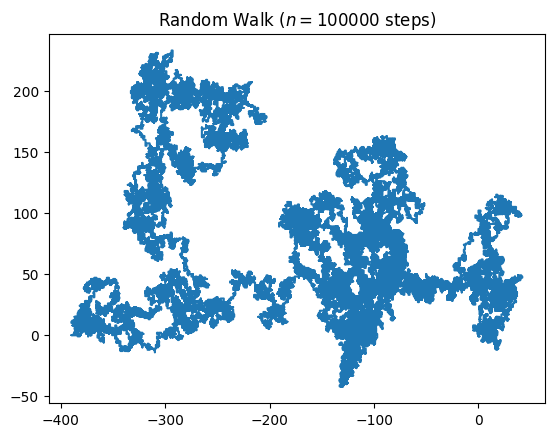

In [10]:
# Python code for 2D random walk.
import numpy
import pylab
import random

# defining the number of steps
n = 100000
walk_speed = 0.0

#creating two array for containing x and y coordinate
#of size equals to the number of size and filled up with 0's
x = numpy.zeros(n)
y = numpy.zeros(n)

# filling the coordinates with random variables
for i in range(1, n):
	val = random.randint(1, 4)
	if val == 1:
		x[i] = x[i - 1] + walk_speed
		y[i] = y[i - 1]
	elif val == 2:
		x[i] = x[i - 1] - walk_speed
		y[i] = y[i - 1]
	elif val == 3:
		x[i] = x[i - 1]
		y[i] = y[i - 1] + walk_speed
	else:
		x[i] = x[i - 1]
		y[i] = y[i - 1] - walk_speed
	

# plotting stuff:
pylab.title("Random Walk ($n = " + str(n) + "$ steps)")
pylab.plot(x, y)
pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600)
pylab.show()
